### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-14,431225,4354758,621255,568788,248167,131210,128413,166795,112829,91874,82470,123356,97208,4848,197340
2021-08-15,431642,4361973,621425,569058,248167,131269,128432,167595,112873,91878,82470,123459,97828,4848,197393
2021-08-16,432079,4371437,622111,569492,248652,131296,128456,168384,112992,91905,82595,123580,98483,4848,197393
2021-08-17,432519,4382152,623112,570598,249529,131466,128510,169169,113116,91927,82739,123688,99108,4848,197539
2021-08-18,432519,4392362,624257,571662,250469,131577,128579,169948,113239,91949,82883,123781,99691,4848,197659


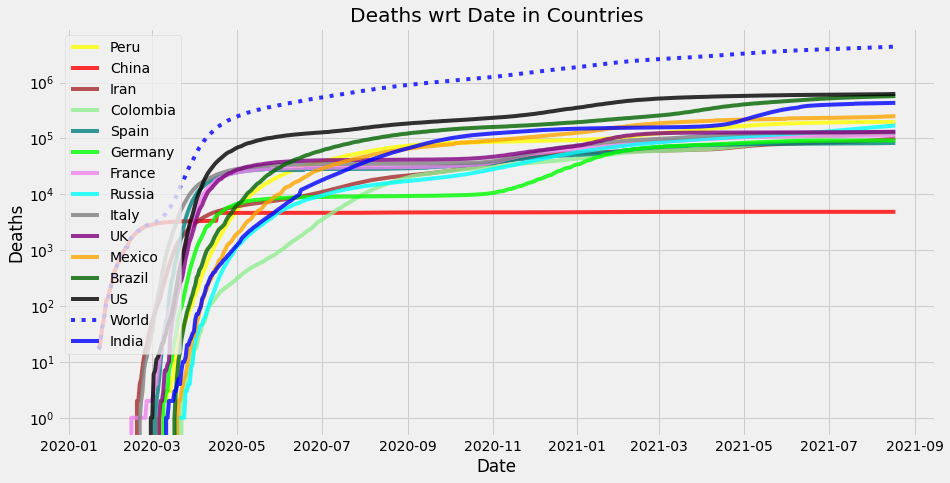

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-14,36083,526728,42707,31142,23642,29226,7181,21531,24427,4675,0,4007,29700,55,1497
2021-08-15,32937,459851,38482,13957,0,26484,5661,21010,21172,3732,0,3132,36736,52,978
2021-08-16,25166,669730,210199,14471,16467,28358,3669,20154,13397,3549,25726,3161,41194,45,0
2021-08-17,35178,658724,128902,37613,14814,26709,5268,20349,24921,5391,14336,3247,50228,31,2015
2021-08-18,0,667034,137815,41714,28953,33758,7159,20312,30027,9008,11956,3154,39174,49,1468


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-14,40875,601218,96493,36471,15918,29346,5293,22026,20612,2929,17833,9250,31580,79,1604
2021-08-15,40345,591794,92626,34970,14857,29155,5317,21958,20649,2983,16644,8842,31923,77,1563
2021-08-16,39333,596989,100464,33603,14964,29102,5207,21838,20165,3021,17250,8464,32541,75,1458
2021-08-17,39056,601105,102360,33871,14954,28942,5211,21739,20482,3179,17055,8116,33721,72,1495
2021-08-18,36453,605500,104723,34393,15887,29263,5341,21644,21119,3567,16715,7785,34084,70,1494


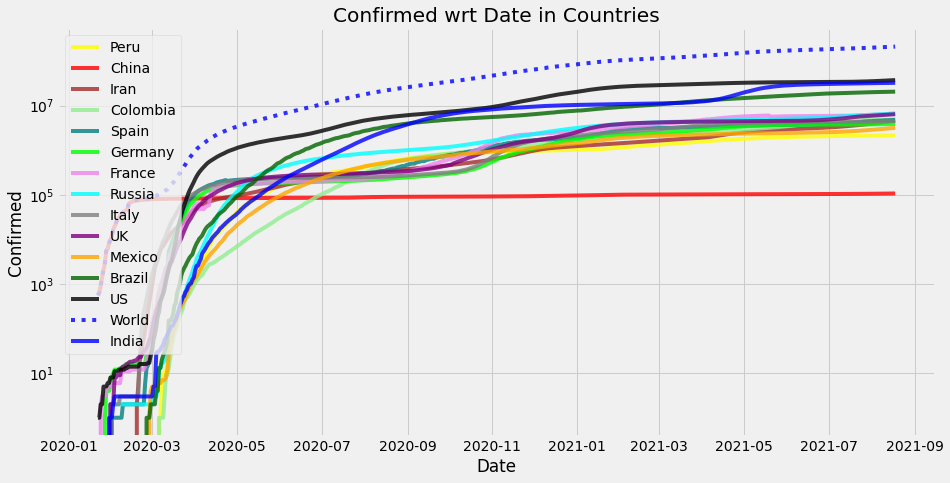

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-14,493,8656,237,926,753,94,34,799,51,3,0,135,466,0,61
2021-08-15,417,7215,170,270,0,59,19,800,44,4,0,103,620,0,53
2021-08-16,437,9464,686,434,485,27,24,789,119,27,125,121,655,0,0
2021-08-17,440,10715,1001,1106,877,170,54,785,124,22,144,108,625,0,146
2021-08-18,0,10210,1145,1064,940,111,69,779,123,22,144,93,583,0,120


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-14,524.46,9670.55,598.67,950.65,538.48,89.70,26.62,776.65,55.70,14.45,59.06,199.26,458.32,-0.0,71.96
2021-08-15,511.02,9363.61,545.09,865.57,471.17,85.87,25.67,779.57,54.23,13.14,51.68,187.23,478.53,-0.0,69.59
2021-08-16,501.77,9376.16,562.70,811.62,472.90,78.51,25.46,780.75,62.33,14.88,60.85,178.95,500.59,-0.0,60.89
2021-08-17,494.05,9543.51,617.49,848.42,523.41,89.94,29.03,781.28,70.04,15.77,71.24,170.08,516.14,-0.0,71.53
2021-08-18,432.29,9626.82,683.43,875.37,575.48,92.58,34.02,781.00,76.66,16.55,80.33,160.45,524.50,-0.0,77.59


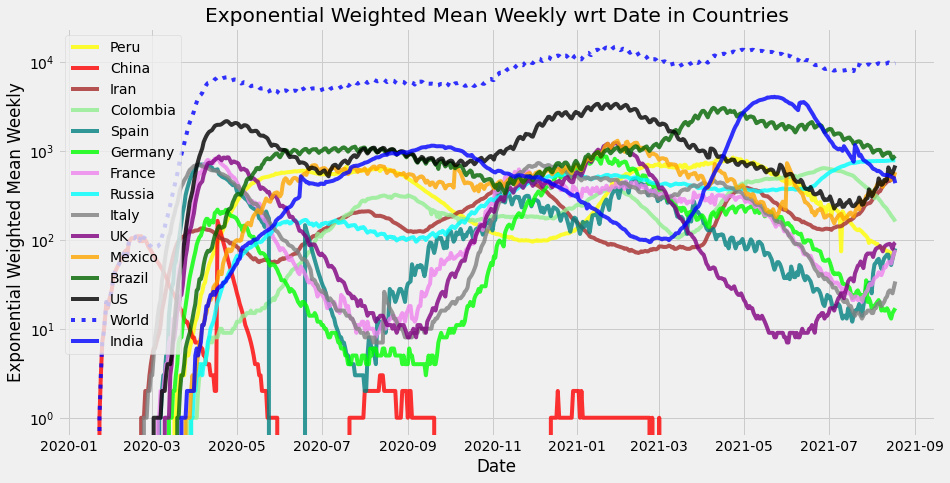

In [18]:
plotter(np.round(AVG), name)

### Stack Plots

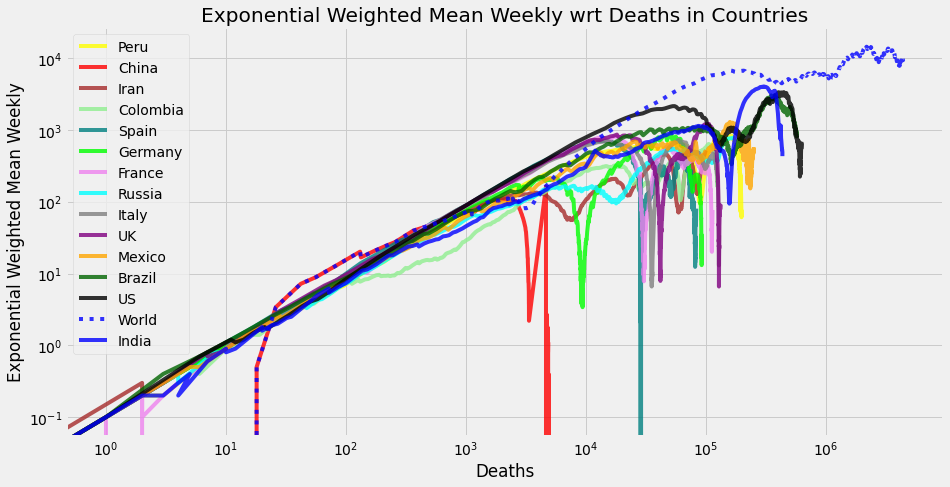

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

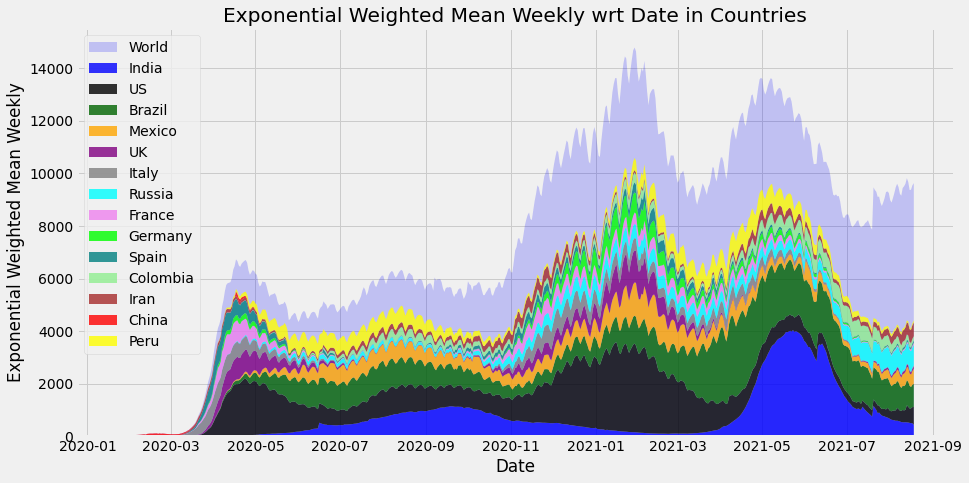

In [20]:
stackplotter(AVG, name)

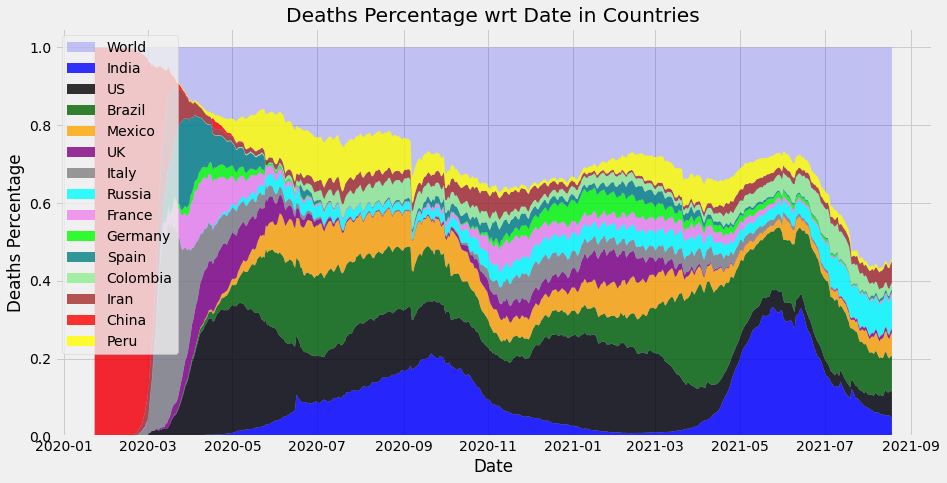

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

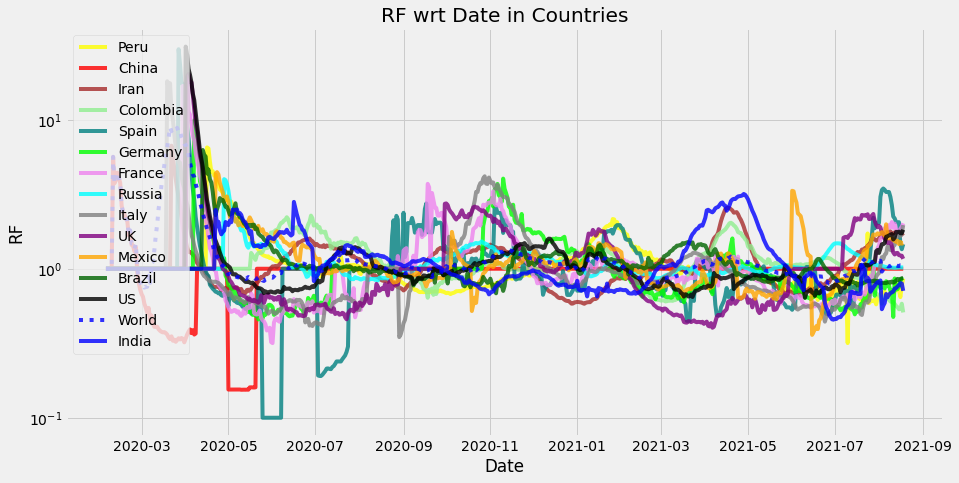

In [23]:
plotter(Reproductivity, 'RF')

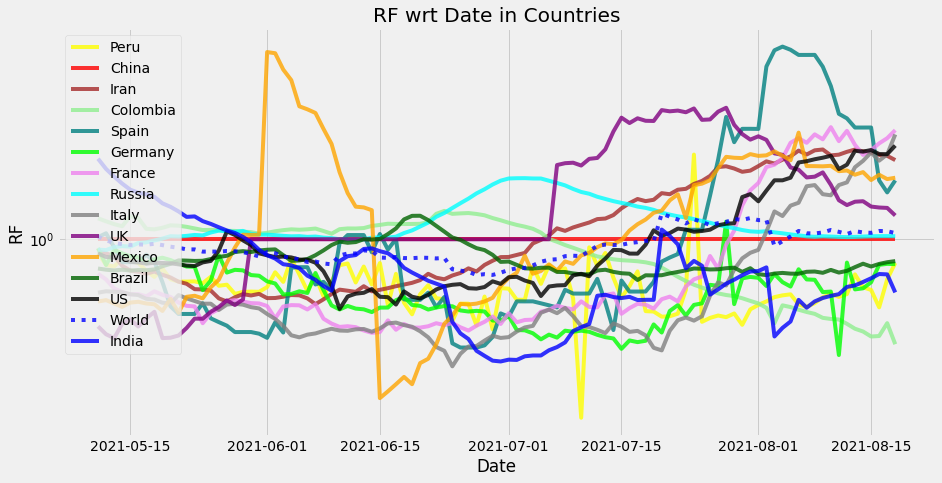

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

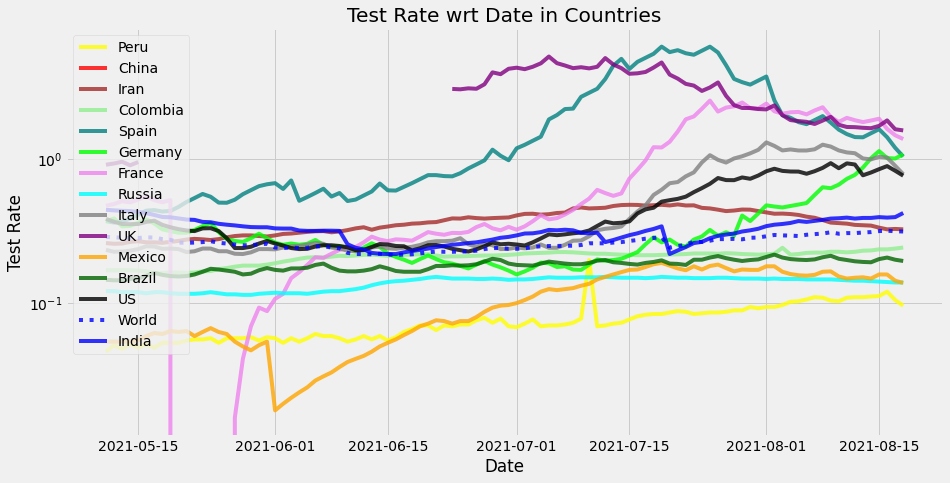

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

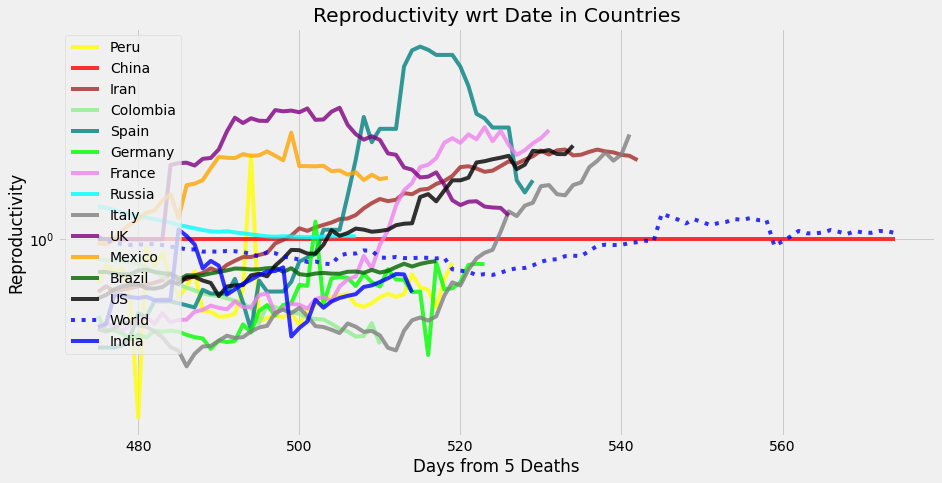

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

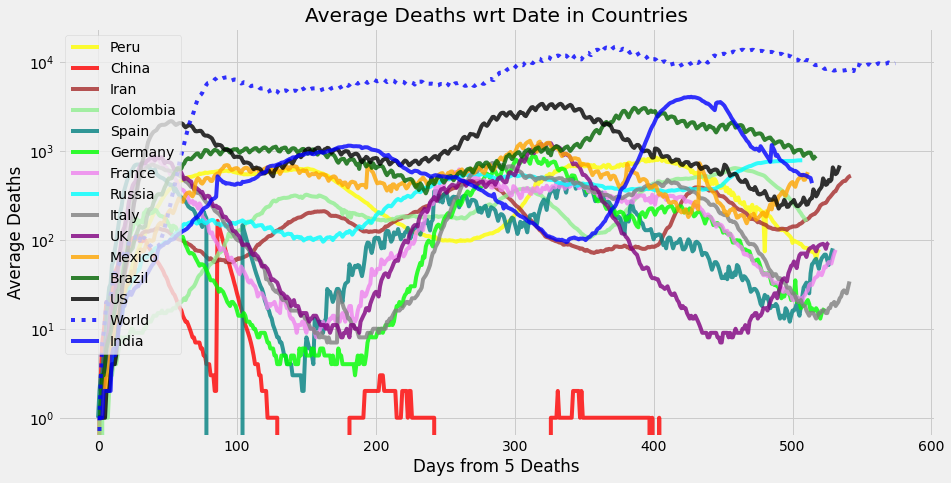

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

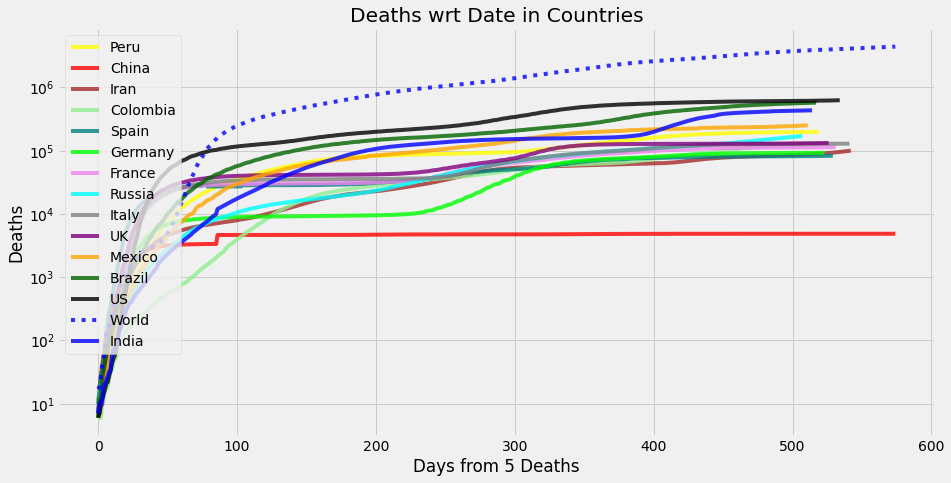

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4392362,10210,9691.86,9626.82,1.0407,209262848,0.314,605500,878.47
US,624257,1145,820.29,683.43,1.8277,37155669,0.766,104723,124.85
Brazil,571662,1064,844.86,875.37,0.8690,20457897,0.196,34393,114.33
India,432519,0,407.14,432.29,0.7104,32285857,0.422,36453,86.50
Mexico,250469,940,609.43,575.48,1.4860,3152205,0.138,15887,50.09
Peru,197659,120,73.29,77.59,0.8587,2137295,0.096,1494,39.53
Russia,169948,779,790.71,781.00,1.0199,6572246,0.139,21644,33.99
UK,131577,111,93.71,92.58,1.1656,6385982,1.580,29263,26.32
Italy,128579,69,39.29,34.02,1.9631,4456765,0.785,5341,25.72


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4392362,10210,9691.86,9626.82,1.0407,209262848,0.314,605500,878.47
Indonesia,121141,1128,1277.57,1397.38,0.8854,3908247,0.106,29569,24.23
Brazil,571662,1064,844.86,875.37,0.8690,20457897,0.196,34393,114.33
US,624257,1145,820.29,683.43,1.8277,37155669,0.766,104723,124.85
Russia,169948,779,790.71,781.00,1.0199,6572246,0.139,21644,33.99
Mexico,250469,940,609.43,575.48,1.4860,3152205,0.138,15887,50.09
Iran,99691,583,577.71,524.50,1.6648,4556417,0.325,34084,19.94
India,432519,0,407.14,432.29,0.7104,32285857,0.422,36453,86.50
South Africa,78377,384,371.86,365.71,0.9838,2638981,0.158,11573,15.68


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  4392362


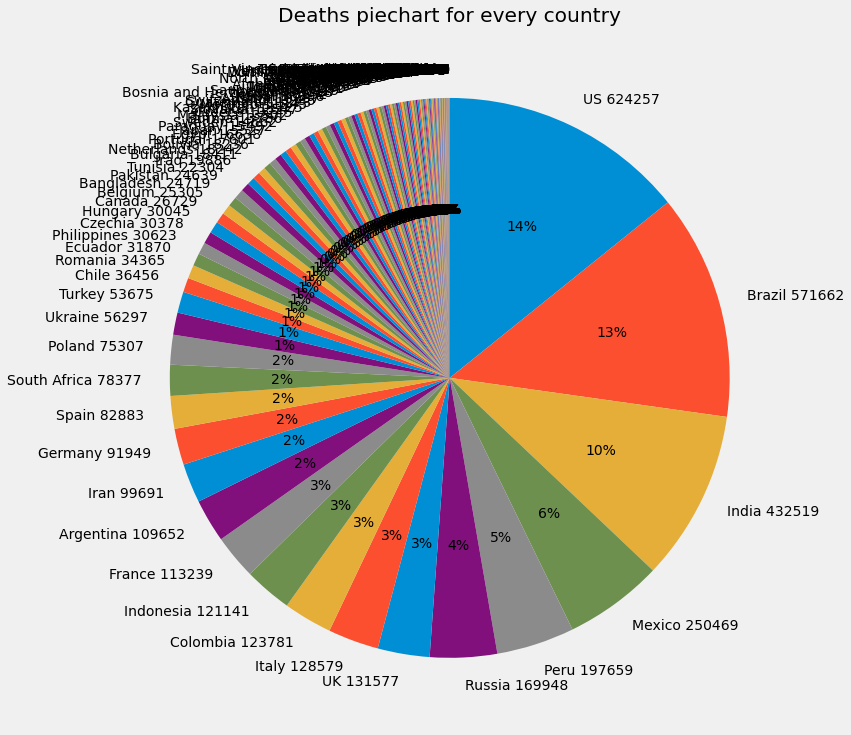

In [35]:
piechart('Deaths')

World total:  9691


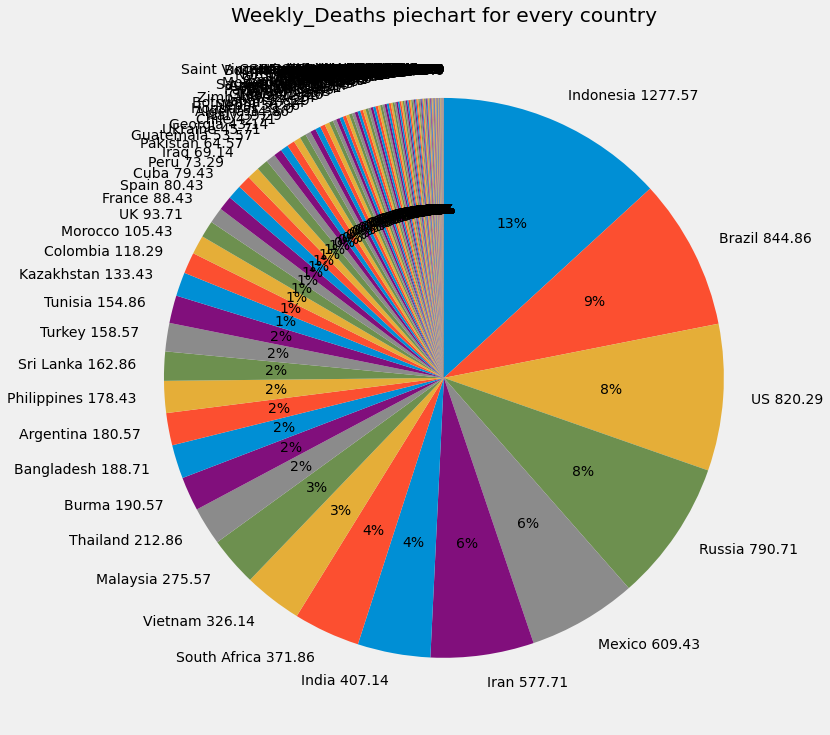

In [36]:
piechart('Weekly_Deaths')

World total:  10210


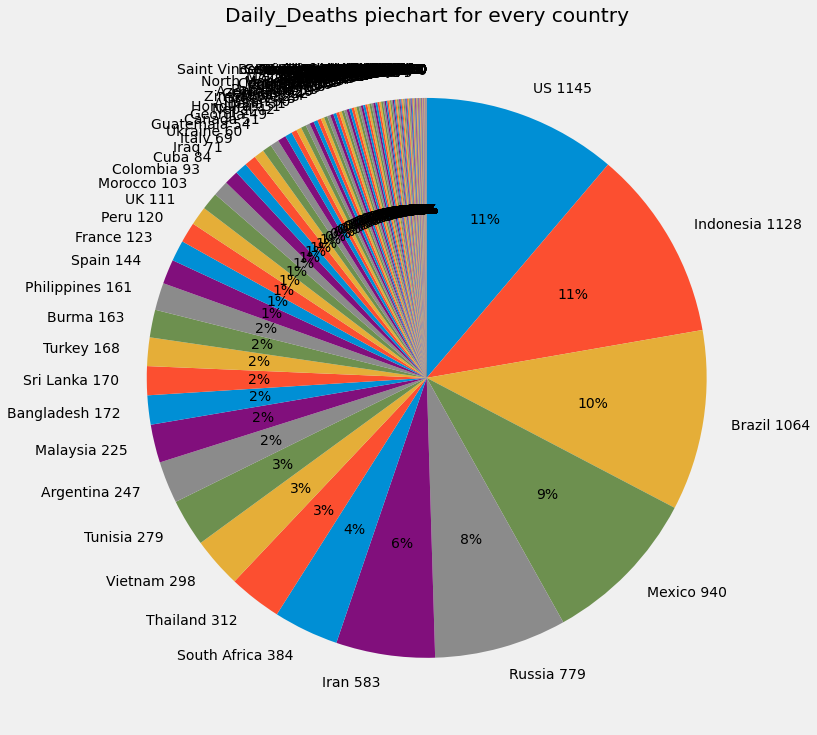

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-08-19


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

878472400.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master 6c3c977] `date` update
 1 file changed, 2117 insertions(+), 2118 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (68%)


To https://github.com/Arrowheadahp/COVID-19.git
   0722244..6c3c977  master -> master
